## Importing libraries

In [2]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

## Reading image

In [3]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

In [4]:
!echo "Images avaialable : "; ls TestData/Images/

Images avaialable : 
chessboard_2.jpg  gect.jpg    notes_inv.png  teapot.png
chessboard.jpg	  monkey.jpg  notes.png


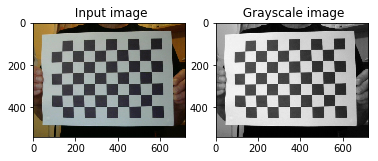

In [14]:
image_name = "chessboard.jpg"
image_path = "TestData/Images/" + image_name

img = cv2.imread(image_path)

if img is None:
    print(" Image could not be read")
else:
    img = ResizeWithAspectRatio(img, width=720)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(" Input image")

    plt.subplot(1, 2, 2)
    plt.imshow(img_gray, cmap="gray")
    plt.title(" Grayscale image")

    plt.show()

In [ ]:
## Bilateral filter
d = 5
sig_col = 100
sig_spa = 100
noise = 10

def update_d(x): 
    global d
    if(d >1):
        d = x
def update_col(x):
    global sig_col
    sig_col = x
def update_spa(x):
    global sig_spa
    sig_spa = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("bilateral")
cv2.createTrackbar("d", "bilateral", d, 10, update_d)
cv2.createTrackbar("sigma_color", "bilateral", sig_col, 1000, update_col)
cv2.createTrackbar("sigma_space", "bilateral", sig_spa, 1000, update_spa)
cv2.createTrackbar("noise", "bilateral", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    noised_img = (img_gray + noise * np.random.randn(img_gray.shape[0], img_gray.shape[1])).astype(np.uint8)

    cv2.imshow("Noised image", noised_img)
    
    out = cv2.bilateralFilter(noised_img, d, sig_col, sig_spa, -1)

    cv2.imshow("bilateral", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [42]:
## Gaussian filter
d = 5
std_dev = 5
noise = 10

def update_d(x): 
    global d
    if(d > 0):
        d = 2*x+1
def update_dev(x):
    global std_dev
    std_dev = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("gaussian")
cv2.createTrackbar("d", "gaussian", d, 10, update_d)
cv2.createTrackbar("std_dev", "gaussian", std_dev, 10, update_dev)
cv2.createTrackbar("noise", "gaussian", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    noised_img = (img_gray + noise * np.random.randn(img_gray.shape[0], img_gray.shape[1])).astype(np.uint8)

    cv2.imshow("Noised image", noised_img)
    
    out=cv2.GaussianBlur(noised_img, (d,d), std_dev)
    
    cv2.imshow("gaussian", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [13]:
## Box filter
d = 5
noise = 10

def update_d(x): 
    global d
    if(x > 0):
        d = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("box")
cv2.createTrackbar("d", "box", d, 10, update_d)
cv2.createTrackbar("noise", "box", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    noised_img = (img_gray + noise * np.random.randn(img_gray.shape[0], img_gray.shape[1])).astype(np.uint8)

    cv2.imshow("Noised image", noised_img)
    
    out=cv2.boxFilter(noised_img, -1, (d,d))
    
    cv2.imshow("box", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [6]:
## Dilation
dh = 5
dw = 5
noise = 10

def update_dh(x): 
    global dh
    if(x > 0):
        dh = x
def update_dw(x): 
    global dw
    if(x > 0):
        dw = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("dilate")
cv2.createTrackbar("dh", "dilate", dh, 10, update_dh)
cv2.createTrackbar("dw", "dilate", dw, 10, update_dw)
cv2.createTrackbar("noise", "dilate", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    
    out=cv2.dilate(img, np.ones((dh,dw)))
    
    cv2.imshow("dilate", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [10]:
## Erosion
dh = 5
dw = 5
noise = 10

def update_dh(x): 
    global dh
    if(x > 0):
        dh = x
def update_dw(x): 
    global dw
    if(x > 0):
        dw = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("erosion")
cv2.createTrackbar("dh", "erosion", dh, 10, update_dh)
cv2.createTrackbar("dw", "erosion", dw, 10, update_dw)
cv2.createTrackbar("noise", "erosion", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    
    out=cv2.erode(img_gray, np.ones((dh,dw)))
    
    cv2.imshow("erosion", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [11]:
## Opening
dh = 5
dw = 5
noise = 10

def update_dh(x): 
    global dh
    if(x > 0):
        dh = x
def update_dw(x): 
    global dw
    if(x > 0):
        dw = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("opening")
cv2.createTrackbar("dh", "opening", dh, 10, update_dh)
cv2.createTrackbar("dw", "opening", dw, 10, update_dw)
cv2.createTrackbar("noise", "opening", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    noised_img = (img_gray + noise * np.random.randn(img_gray.shape[0], img_gray.shape[1])).astype(np.uint8)
    
    cv2.imshow("Noised image", noised_img)

    out=cv2.erode(noised_img, np.ones((dh,dw)))
    out=cv2.dilate(out, np.ones((dh,dw)))
    
    cv2.imshow("opening", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [15]:
## Closing
dh = 5
dw = 5
noise = 10

def update_dh(x): 
    global dh
    if(x > 0):
        dh = x
def update_dw(x): 
    global dw
    if(x > 0):
        dw = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("closing")
cv2.createTrackbar("dh", "closing", dh, 10, update_dh)
cv2.createTrackbar("dw", "closing", dw, 10, update_dw)
cv2.createTrackbar("noise", "closing", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    noised_img = (img_gray + noise * np.random.randn(img_gray.shape[0], img_gray.shape[1])).astype(np.uint8)
    noised_img = img
    
    cv2.imshow("Noised image", noised_img)

    out=cv2.dilate(noised_img, np.ones((dh,dw)))
    out=cv2.erode(out, np.ones((dh,dw)))
    
    cv2.imshow("closing", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()